# Arttu Häkkinen
# 596077

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0,1], [-1/2, 3/2], [3/2, 5/2], [1, 3]])
A

array([[ 0. ,  1. ],
       [-0.5,  1.5],
       [ 1.5,  2.5],
       [ 1. ,  3. ]])

## a)

Carry out the principal component analysis of these data, that is, compute the eigenvalue decomposition of the corresponding sample covariance matrix.

In [3]:
# First we need to normalize the data, so we center the data around its mean.
rows, columns = A.shape
A_tilde = np.ones_like(A)

for c in range(columns):
    c_mean = np.mean(A[:, c])
    c_std = np.std(A[:, c])
    for r in range(rows):
        A_tilde[r, c] = (A[r, c] - c_mean)
        
A_tilde

array([[-0.5, -1. ],
       [-1. , -0.5],
       [ 1. ,  0.5],
       [ 0.5,  1. ]])

In [4]:
A_tilde.mean()

0.0

In [5]:
# Next we compute the empirical covariance matrix
n, d = A_tilde.shape
S = (A_tilde.T @ A_tilde) / (n - 1)
S

array([[0.83333333, 0.66666667],
       [0.66666667, 0.83333333]])

In [6]:
# Computing the eigenvalue decomposition of S
eigenvals, eigenvects = np.linalg.eig(S)
eigenvects

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Each eigenvector/column corresponds one principal component of the data.

In [7]:
eigenvals

array([1.5       , 0.16666667])

The eigenvalues on the other hand describe how much of the variability in the data is contained in the corresponding eigenvector. This is, the first eigenvalue corresponds to the first principal component, and so on.

## b)

Consider the resulting decomposition.
 
### i.
 
Use it to transform the original 2-dimensional data set into a
1-dimensional representation (a 4 × 1 matrix) such that the
variance of the resulting data is equal to the largest eigenvalue.

In [8]:
# The 1-dim representation x1d
v = eigenvects[:, 0]
x1d = A_tilde @ v
x1d

array([-1.06066017, -1.06066017,  1.06066017,  1.06066017])

In [9]:
# Check the variance of the 1-dim representation
mu = np.sum(x1d) / n
var = np.sum((x1d - mu)**2) / (n - 1)
var

1.4999999999999998

### ii.

Next, use it to transform the original data set into a 2-dimensional
representation, such that the variance of one of the columns
is equal to the smallest eigenvalue.

In [10]:
# The 2-dim representation X
X = A_tilde @ eigenvects
X

array([[-1.06066017, -0.35355339],
       [-1.06066017,  0.35355339],
       [ 1.06066017, -0.35355339],
       [ 1.06066017,  0.35355339]])

In [11]:
# Compute the variances of the columns
for c in range(X.shape[1]):
    x = X[:, c]
    mu = np.sum(x) / n
    var = np.sum((x - mu)**2) / (n - 1)
    print("The variance of the column no. {} is {}".format(c+1, var))

The variance of the column no. 1 is 1.4999999999999998
The variance of the column no. 2 is 0.16666666666666663


So, the variance of the second column is equal to the smallest eigenvalue.

## c)

### i.

In [12]:
# Helper function to calculate euclidean distance between 2 points
def euclidean(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [13]:
n, d = A.shape
print("Euclidean distance between points...")
visited = []
for i in range(n):
    for j in range(n):
        if (j, i) not in visited:
            visited.append((i, j))
            if j != i:
                x = A[i,:].T
                y = A[j,:].T
                print("- ...{} and {} is {}.".format(i+1, j+1, euclidean(x, y)))

Euclidean distance between points...
- ...1 and 2 is 0.7071067811865476.
- ...1 and 3 is 2.1213203435596424.
- ...1 and 4 is 2.23606797749979.
- ...2 and 3 is 2.23606797749979.
- ...2 and 4 is 2.1213203435596424.
- ...3 and 4 is 0.7071067811865476.


### ii.

In [14]:
n, d = A.shape
print("Euclidean distance between points...")
visited = []
for i in range(n):
    for j in range(n):
        if (j, i) not in visited:
            visited.append((i, j))
            if j != i:
                x = x1d[i]
                y = x1d[j]
                print("- ...{} and {} is {}.".format(i+1, j+1, euclidean(x, y)))

Euclidean distance between points...
- ...1 and 2 is 0.0.
- ...1 and 3 is 2.1213203435596424.
- ...1 and 4 is 2.1213203435596424.
- ...2 and 3 is 2.1213203435596424.
- ...2 and 4 is 2.1213203435596424.
- ...3 and 4 is 0.0.


### iii.

In [15]:
n, d = A.shape
print("Euclidean distance between points...")
visited = []
for i in range(n):
    for j in range(n):
        if (j, i) not in visited:
            visited.append((i, j))
            if j != i:
                x = X[i,:].T
                y = X[j,:].T
                print("- ...{} and {} is {}.".format(i+1, j+1, euclidean(x, y)))

Euclidean distance between points...
- ...1 and 2 is 0.7071067811865475.
- ...1 and 3 is 2.1213203435596424.
- ...1 and 4 is 2.2360679774997894.
- ...2 and 3 is 2.2360679774997894.
- ...2 and 4 is 2.1213203435596424.
- ...3 and 4 is 0.7071067811865475.


### iv.

All the pairwise distances are the same with the original data set and the 2d transfomed representation. This is of course the case because the 2d transformed representation corresponds to the original data set's point cloud, only with different mean location (origin) and direction of maximum variance (x-axis). This can be easily seen from the figure below.

The 1d representation lies on x axis and has the zero distances between poits 1-2 and 3-4 because like in the original data, the distance between these points is zero when we only consider the x axis. The other distances on the other hand are the same as the distances between original data set's points 1-3 and 2-4. This too can be easily seen from the figure below.

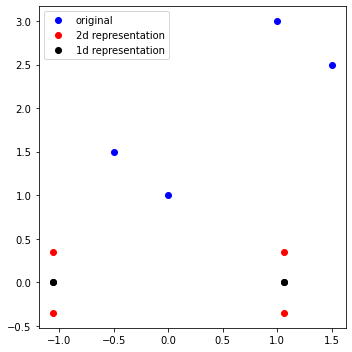

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,5));
ax.plot(A[:, 0], A[:, 1], 'bo', label='original')
ax.plot(X[:, 0], X[:, 1], 'ro', label='2d representation')
ax.plot(x1d, [0,0,0,0], 'ko', label='1d representation')
ax.legend()
fig.tight_layout()

## d)

#### Repeat exercises 3a and 3b on these data. What are the similarities and differences between the results on this data set and the first one?

Define the new data:

In [17]:
A_new = np.array([[np.sqrt(1/2),np.sqrt(1/2)],
               [np.sqrt(1/2), 2*np.sqrt(1/2)],
               [4*np.sqrt(1/2), np.sqrt(1/2)],
               [4*np.sqrt(1/2), 2*np.sqrt(1/2)]])
A_new

array([[0.70710678, 0.70710678],
       [0.70710678, 1.41421356],
       [2.82842712, 0.70710678],
       [2.82842712, 1.41421356]])

Normalize new data:

In [18]:
# Center the data around its mean
rows, columns = A_new.shape
A_tilde_new = np.ones_like(A_new)

for c in range(columns):
    c_mean = np.mean(A_new[:, c])
    c_std = np.std(A_new[:, c])
    for r in range(rows):
        A_tilde_new[r, c] = (A_new[r, c] - c_mean)
        
A_tilde_new

array([[-1.06066017, -0.35355339],
       [-1.06066017,  0.35355339],
       [ 1.06066017, -0.35355339],
       [ 1.06066017,  0.35355339]])

In [19]:
A_tilde_new.mean()

0.0

Normalized data seems different than with the original data but is similar with original data's 2d representation. The mean is naturally zero for both of these. 

Compute the covariance matrix for new data:

In [20]:
# compute the empirical covariance matrix
n, d = A_tilde_new.shape
S_new = (A_tilde_new.T @ A_tilde_new) / (n - 1)
S_new

array([[1.5       , 0.        ],
       [0.        , 0.16666667]])

Different covariance matrix than the original data's covariance matrix. The diagonal values match with the original data's eigenvalues though.

Computing the eigenvalue decomposition for the new data:

In [21]:
# Computing the eigenvalue decomposition of S
eigenvals_new, eigenvects_new = np.linalg.eig(S_new)
eigenvects_new

array([[1., 0.],
       [0., 1.]])

In [22]:
eigenvals_new

array([1.5       , 0.16666667])

Eigenvectors are unit vectors to both x and y axis directions. The eigenvalues are the same with both of the data sets.

Computing the 1d representation for the new data set:

In [23]:
# The 1-dim representation x1d_new
v_new = eigenvects_new[:, 0]
x1d_new = A_tilde @ v_new
x1d_new

array([-0.5, -1. ,  1. ,  0.5])

Same as with original data.

Computing the variance:

In [24]:
# Check the variance of the 1-dim representation x1d_new
mu_new = np.sum(x1d_new) / n
var_new = np.sum((x1d_new - mu_new)**2) / (n - 1)
var_new

0.8333333333333334

Same with original data, the first eigenvalue of the new data and the first eigenvalue of the original data.

Computing the 2-dim representation:

In [25]:
# The 2-dim representation X
X_new = A_tilde_new @ eigenvects_new
X_new

array([[-1.06066017, -0.35355339],
       [-1.06066017,  0.35355339],
       [ 1.06066017, -0.35355339],
       [ 1.06066017,  0.35355339]])

Same as the normalized new data and the 2d representation of the original data.

The variances will be same too as the 2d representation's variances but compute them anyway:

In [26]:
# Compute the variances of the columns
for c in range(X_new.shape[1]):
    x = X_new[:, c]
    mu = np.sum(x) / n
    var = np.sum((x - mu)**2) / (n - 1)
    print("The variance of the column no. {} is {}".format(c+1, var))

The variance of the column no. 1 is 1.5000000000000002
The variance of the column no. 2 is 0.1666666666666667


####  Can you give a geometric explanation for the similarities?

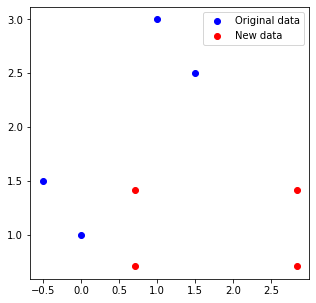

In [27]:
# Plotting the two data series
fig, ax = plt.subplots(1, 1, figsize=(5,5));

ax.plot(A[:, 0], A[:, 1], 'bo', label="Original data")
ax.plot(A_new[:, 0], A_new[:, 1], 'ro', label="New data")
ax.legend()

When we plot the two data series we see that the point clouds are similar except they have a different location and orientation. This explains why they have the same 2d representation. We can also see that if the new data is only normalized, it reaches it's PCA form because already by default its orientation of maximum variance is parallel with the x-axis.